# Dense Deep Neural Network: Handwritten Digit Recognition
## This homework is done in partnership by:
### Devansh Batra (batra17@purdue.edu)
### Lakshay Vohra (lvohra@purdue.edu)

## Model 1


This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a dense neural network to predict the class of digit.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

##Adding seed for reproducibility
from numpy.random import seed
seed(2)

!pip install tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

##Adding seed for reproducibility
tf.random.set_seed(20)

## The MNIST dataset

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it. 

In [3]:
help(mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [4]:
# the data, shuffled and split between train and test sets 
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

### Reshape and normalize the features

In [5]:
input_dim = 784 # 28*28
X_train = X_train_pre.reshape(X_train_pre.shape[0], input_dim) 
X_test = X_test_pre.reshape(X_test_pre.shape[0], input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255. 
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 784)
60000 train samples, 10000 test samples


### convert class vectors to binary class matrices
convert class label to one-hot coding

In [6]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 5 samples are 5,0,4,1,9
y_train[:5,] 

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [7]:
validation_split = 0.16667
## Added seed in here
index = np.random.RandomState(seed = 100).permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

training data shape: (50000, 784)
50000 train samples, 10000 validation samples, 10000 test samples


## Final model that showed the best results as per our experiments

### Build the model

In [17]:
#from keras.layers import Dropout

model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,))) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [19]:
EPOCHS = 20

history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val))

Epoch 1/20
782/782 [==============================] - 4s 4ms/step - loss: 0.2235 - accuracy: 0.9329 - val_loss: 0.1197 - val_accuracy: 0.9643
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0862 - accuracy: 0.9732 - val_loss: 0.1064 - val_accuracy: 0.9669
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0561 - accuracy: 0.9823 - val_loss: 0.0871 - val_accuracy: 0.9732
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0921 - val_accuracy: 0.9761
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0329 - accuracy: 0.9892 - val_loss: 0.0826 - val_accuracy: 0.9782
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.0776 - val_accuracy: 0.9795
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0765 - val_accuracy: 0.9815
Epoch 

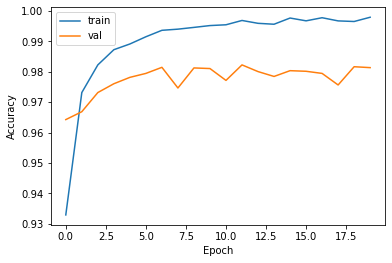

In [20]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [21]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 97.95%


Make predictions for testing data

In [22]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred[:5]

array([7, 2, 1, 0, 4], dtype=int64)

Visualize predictions

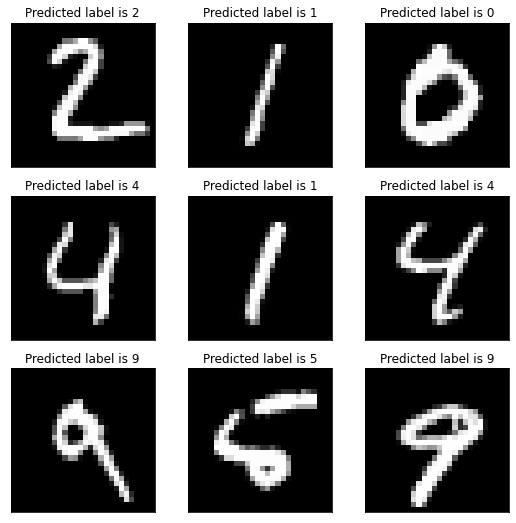

In [23]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(1, col*row +1):
    pred = y_pred[i]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

## Early Stopping

In [24]:
EPOCHS = 20

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)


history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.1197 - val_accuracy: 0.9820
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.1495 - val_accuracy: 0.9796
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.1184 - val_accuracy: 0.9804
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.1239 - val_accuracy: 0.9830
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.1222 - val_accuracy: 0.9826
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.1120 - val_accuracy: 0.9841
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.1554 - val_accuracy: 0.9770
Epoch 

In [25]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.36%


### The model above shows a test accuracy of 98.36% after incorporating early stopping using Patience. This was selected as the final model.